In [413]:
#importing the required libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import math
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [414]:
dataset = pd.read_csv('/Users/manavjairam/Desktop/Datahacks-2022/beginner.csv')

In [415]:
dataset

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,...,BPL,EMPSTAT,OCC,UHRSWORKT,WKSTAT,JOBCERT,EDUC,EDDIPGED,INCWAGE,OINCWAGE
0,2015,16566,3,NaN,0,1.0,NaN,1671.32,12,42,...,9900,10,1910,50,11,NaN,111,NaN,100000.0,0.0
1,2020,49554,6,1930.4505,20200504991400,NaN,NaN,NaN,33,40,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
2,2019,94327,3,NaN,0,1.0,NaN,433.89,42,15,...,50040,36,0,999,99,NaN,73,NaN,0.0,0.0
3,2011,14553,3,NaN,20091201475800,1.0,NaN,2996.70,12,36,...,9900,36,0,999,99,NaN,73,NaN,0.0,0.0
4,2018,31356,3,NaN,20170102597500,1.0,NaN,1719.16,22,20,...,9900,34,0,999,99,NaN,81,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54732,2020,41349,10,766.1293,20191004211300,NaN,NaN,NaN,41,35,...,9900,36,0,999,99,99.0,111,99.0,NaN,NaN
54733,2011,76658,3,NaN,20100300901100,1.0,NaN,1477.03,41,8,...,9900,36,0,999,99,NaN,81,NaN,3600.0,0.0
54734,2021,65040,11,873.0294,20201006551800,NaN,NaN,NaN,31,54,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
54735,2020,57273,12,4327.6454,20201005723900,NaN,NaN,NaN,33,48,...,9900,21,5320,999,60,99.0,73,1.0,NaN,NaN


In [416]:
dataset.get('HWTFINL')

0              NaN
1        1930.4505
2              NaN
3              NaN
4              NaN
           ...    
54732     766.1293
54733          NaN
54734     873.0294
54735    4327.6454
54736          NaN
Name: HWTFINL, Length: 54737, dtype: float64

In [417]:
dataset = dataset.drop(['YEAR', 'SERIAL','MONTH'], axis = 1)

In [418]:
dataset

,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,NFAMS,PERNUM,WTFINL,...,BPL,EMPSTAT,OCC,UHRSWORKT,WKSTAT,JOBCERT,EDUC,EDDIPGED,INCWAGE,OINCWAGE
0,NaN,0,1.0,NaN,1671.32,12,42,1,1,NaN,...,9900,10,1910,50,11,NaN,111,NaN,100000.0,0.0
1,1930.4505,20200504991400,NaN,NaN,NaN,33,40,1,3,1718.6423,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
2,NaN,0,1.0,NaN,433.89,42,15,1,2,NaN,...,50040,36,0,999,99,NaN,73,NaN,0.0,0.0
3,NaN,20091201475800,1.0,NaN,2996.70,12,36,1,1,NaN,...,9900,36,0,999,99,NaN,73,NaN,0.0,0.0
4,NaN,20170102597500,1.0,NaN,1719.16,22,20,1,3,NaN,...,9900,34,0,999,99,NaN,81,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54732,766.1293,20191004211300,NaN,NaN,NaN,41,35,1,1,766.1293,...,9900,36,0,999,99,99.0,111,99.0,NaN,NaN
54733,NaN,20100300901100,1.0,NaN,1477.03,41,8,1,1,NaN,...,9900,36,0,999,99,NaN,81,NaN,3600.0,0.0
54734,873.0294,20201006551800,NaN,NaN,NaN,31,54,3,3,1468.4471,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
54735,4327.6454,20201005723900,NaN,NaN,NaN,33,48,2,2,4464.9943,...,9900,21,5320,999,60,99.0,73,1.0,NaN,NaN


In [419]:
x = np.array(dataset.get('HWTFINL'))

In [420]:

HWTFINL = [item for item in x if not(math.isnan(item)) == True]



In [421]:
dataset

,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,NFAMS,PERNUM,WTFINL,...,BPL,EMPSTAT,OCC,UHRSWORKT,WKSTAT,JOBCERT,EDUC,EDDIPGED,INCWAGE,OINCWAGE
0,NaN,0,1.0,NaN,1671.32,12,42,1,1,NaN,...,9900,10,1910,50,11,NaN,111,NaN,100000.0,0.0
1,1930.4505,20200504991400,NaN,NaN,NaN,33,40,1,3,1718.6423,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
2,NaN,0,1.0,NaN,433.89,42,15,1,2,NaN,...,50040,36,0,999,99,NaN,73,NaN,0.0,0.0
3,NaN,20091201475800,1.0,NaN,2996.70,12,36,1,1,NaN,...,9900,36,0,999,99,NaN,73,NaN,0.0,0.0
4,NaN,20170102597500,1.0,NaN,1719.16,22,20,1,3,NaN,...,9900,34,0,999,99,NaN,81,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54732,766.1293,20191004211300,NaN,NaN,NaN,41,35,1,1,766.1293,...,9900,36,0,999,99,99.0,111,99.0,NaN,NaN
54733,NaN,20100300901100,1.0,NaN,1477.03,41,8,1,1,NaN,...,9900,36,0,999,99,NaN,81,NaN,3600.0,0.0
54734,873.0294,20201006551800,NaN,NaN,NaN,31,54,3,3,1468.4471,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
54735,4327.6454,20201005723900,NaN,NaN,NaN,33,48,2,2,4464.9943,...,9900,21,5320,999,60,99.0,73,1.0,NaN,NaN


In [422]:
dataset.get('WKSTAT')

0        11
1        99
2        99
3        99
4        99
         ..
54732    99
54733    99
54734    99
54735    60
54736    99
Name: WKSTAT, Length: 54737, dtype: int64

In [423]:
dataset = dataset.drop(['CPSID'], axis = 1)

In [424]:
dataset

,HWTFINL,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,NFAMS,PERNUM,WTFINL,CPSIDP,...,BPL,EMPSTAT,OCC,UHRSWORKT,WKSTAT,JOBCERT,EDUC,EDDIPGED,INCWAGE,OINCWAGE
0,NaN,1.0,NaN,1671.32,12,42,1,1,NaN,0,...,9900,10,1910,50,11,NaN,111,NaN,100000.0,0.0
1,1930.4505,NaN,NaN,NaN,33,40,1,3,1718.6423,20200504991403,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
2,NaN,1.0,NaN,433.89,42,15,1,2,NaN,0,...,50040,36,0,999,99,NaN,73,NaN,0.0,0.0
3,NaN,1.0,NaN,2996.70,12,36,1,1,NaN,20091201475801,...,9900,36,0,999,99,NaN,73,NaN,0.0,0.0
4,NaN,1.0,NaN,1719.16,22,20,1,3,NaN,20170102597503,...,9900,34,0,999,99,NaN,81,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54732,766.1293,NaN,NaN,NaN,41,35,1,1,766.1293,20191004211301,...,9900,36,0,999,99,99.0,111,99.0,NaN,NaN
54733,NaN,1.0,NaN,1477.03,41,8,1,1,NaN,20100300901101,...,9900,36,0,999,99,NaN,81,NaN,3600.0,0.0
54734,873.0294,NaN,NaN,NaN,31,54,3,3,1468.4471,20201006551803,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
54735,4327.6454,NaN,NaN,NaN,33,48,2,2,4464.9943,20201005723902,...,9900,21,5320,999,60,99.0,73,1.0,NaN,NaN


In [425]:
#X = dataset.drop('OINCWAGE',axis = 1)

In [426]:
#y = X['INCWAGE']

In [427]:
#X = X.drop('INCWAGE', axis = 1)

In [428]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [429]:
#ss = StandardScaler()
#X_train_scaled = ss.fit_transform(X_train)
#X_test_scaled = ss.transform(X_test)

In [430]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
importance = model.coef_
 summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

IndentationError: unexpected indent (<ipython-input-430-844451dddfb5>, line 4)

In [431]:
#plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
#plt.title('Feature importances obtained from coefficients', size=20)
#plt.xticks(rotation='vertical')
#plt.show()

In [432]:
dataset = dataset.drop('CPSIDP', axis = 1)

In [433]:
dataset

,HWTFINL,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,NFAMS,PERNUM,WTFINL,ASECWT,...,BPL,EMPSTAT,OCC,UHRSWORKT,WKSTAT,JOBCERT,EDUC,EDDIPGED,INCWAGE,OINCWAGE
0,NaN,1.0,NaN,1671.32,12,42,1,1,NaN,1671.32,...,9900,10,1910,50,11,NaN,111,NaN,100000.0,0.0
1,1930.4505,NaN,NaN,NaN,33,40,1,3,1718.6423,NaN,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
2,NaN,1.0,NaN,433.89,42,15,1,2,NaN,433.89,...,50040,36,0,999,99,NaN,73,NaN,0.0,0.0
3,NaN,1.0,NaN,2996.70,12,36,1,1,NaN,2996.70,...,9900,36,0,999,99,NaN,73,NaN,0.0,0.0
4,NaN,1.0,NaN,1719.16,22,20,1,3,NaN,1871.07,...,9900,34,0,999,99,NaN,81,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54732,766.1293,NaN,NaN,NaN,41,35,1,1,766.1293,NaN,...,9900,36,0,999,99,99.0,111,99.0,NaN,NaN
54733,NaN,1.0,NaN,1477.03,41,8,1,1,NaN,1477.03,...,9900,36,0,999,99,NaN,81,NaN,3600.0,0.0
54734,873.0294,NaN,NaN,NaN,31,54,3,3,1468.4471,NaN,...,9900,0,0,999,99,99.0,1,99.0,NaN,NaN
54735,4327.6454,NaN,NaN,NaN,33,48,2,2,4464.9943,NaN,...,9900,21,5320,999,60,99.0,73,1.0,NaN,NaN


In [434]:
x = dataset[['AGE','SEX','RACE','MARST']]

In [435]:
values = np.array(x.get('MARST'))

In [436]:
values

array([1, 9, 1, ..., 9, 6, 6])

In [437]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


[0 6 0 ... 6 5 5]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [438]:
len(onehot_encoded)

54737

In [439]:
x.shape

(54737, 4)

In [440]:
x = x.drop('MARST',axis = 1)


In [441]:
x['MARST'] = onehot_encoded.tolist()

In [442]:
x

,AGE,SEX,RACE,MARST
0,31,1,100,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,8,1,100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
2,37,2,651,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,80,2,100,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,19,2,100,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
...,...,...,...,...
54732,78,1,100,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
54733,78,1,100,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
54734,14,2,100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
54735,32,2,100,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"


In [443]:
values = np.array(x.get('RACE'))

In [444]:
values

array([100, 100, 651, ..., 100, 100, 813])

In [445]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [446]:
label_encoded = le.fit_transform(values)

In [447]:
x = x.drop('RACE', axis = 1)

In [448]:
x

,AGE,SEX,MARST
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
2,37,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,80,2,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,19,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
...,...,...,...
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
54735,32,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"


In [449]:
x['RACE'] = label_encoded.tolist()

In [450]:
x

,AGE,SEX,MARST,RACE
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0
2,37,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3
3,80,2,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",0
4,19,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0
...,...,...,...,...
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0
54735,32,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0


In [451]:
dataset.get('INCWAGE')


0          100000.0
1               NaN
2               0.0
3               0.0
4               0.0
            ...    
54732           NaN
54733        3600.0
54734           NaN
54735           NaN
54736    99999999.0
Name: INCWAGE, Length: 54737, dtype: float64

In [452]:
x = x.assign(INCWAGE = dataset.get('INCWAGE'))

In [453]:
x

,AGE,SEX,MARST,RACE,INCWAGE
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,100000.0
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,NaN
2,37,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3,0.0
3,80,2,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",0,0.0
4,19,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,0.0
...,...,...,...,...,...
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0,NaN
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,3600.0
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,NaN
54735,32,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,NaN


In [454]:
x = x[x.get('INCWAGE')!=99999999.0]

In [455]:
x

,AGE,SEX,MARST,RACE,INCWAGE
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,100000.0
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,NaN
2,37,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3,0.0
3,80,2,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",0,0.0
4,19,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,0.0
...,...,...,...,...,...
54731,75,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,NaN
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0,NaN
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,3600.0
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,NaN


In [456]:
mean = x.get('INCWAGE').mean()

In [457]:
x['INCWAGE']=x['INCWAGE'].fillna(mean)

<ipython-input-457-5fda92b00edf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['INCWAGE']=x['INCWAGE'].fillna(mean)


In [458]:
x

,AGE,SEX,MARST,RACE,INCWAGE
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,100000.000000
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,28710.620889
2,37,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3,0.000000
3,80,2,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",0,0.000000
4,19,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,0.000000
...,...,...,...,...,...
54731,75,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,28710.620889
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0,28710.620889
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,3600.000000
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,28710.620889


In [459]:
x = x[x.get('INCWAGE')!=0]

In [460]:
x

,AGE,SEX,MARST,RACE,INCWAGE
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,100000.000000
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,28710.620889
6,68,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,28710.620889
7,73,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,28710.620889
8,25,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,28710.620889
...,...,...,...,...,...
54731,75,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0,28710.620889
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0,28710.620889
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,3600.000000
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0,28710.620889


In [461]:
y = x['INCWAGE']

In [462]:
x = x.drop('INCWAGE', axis = 1)

In [463]:
x

,AGE,SEX,MARST,RACE
0,31,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
1,8,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0
6,68,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
7,73,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
8,25,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0
...,...,...,...,...
54731,75,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0
54732,78,1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0
54733,78,1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
54734,14,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",0


In [464]:
Row_list = []
for index, rows in x.iterrows():
    # Create list for the current row
    my_list =[rows.AGE, rows.SEX, rows.MARST,rows.RACE]
      
    # append the list to the final list
    Row_list.append(my_list)
  
# Print the list
print(Row_list[0])

[31, 1, [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0]


In [465]:
a = Row_list[0]
type(a)

list

In [466]:
l = []
for i in Row_list:
    check =[]
    for j in i:
        if type(j)==list:
            for k in j:
                check.append(k)
        else:
            check.append(j)
    l.append(check)
print(l[0])

[31, 1, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]


In [467]:
y

0        100000.000000
1         28710.620889
6         28710.620889
7         28710.620889
8         28710.620889
             ...      
54731     28710.620889
54732     28710.620889
54733      3600.000000
54734     28710.620889
54735     28710.620889
Name: INCWAGE, Length: 41698, dtype: float64

In [468]:
y = y.to_list()

In [469]:
y

[100000.0,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 1500.0,
 28710.620888935588,
 28710.620888935588,
 35000.0,
 15600.0,
 28710.620888935588,
 2000.0,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 125000.0,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 41000.0,
 5000.0,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 22000.0,
 48000.0,
 18000.0,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 210000.0,
 28973.0,
 28710.620888935588,
 30002.0,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 28710.620888935588,
 60000.0,
 120000.0,
 75000.0,
 45000.0,
 35000.0,
 75000.0,
 1200.0,
 30000.0,
 16000.0,
 28710.620888935588,
 28710.620888935588,
 40000.0,
 28710.620888935588,
 28710.620888935588,
 55000.0,
 28710.620888935588,
 28710.620888935588,
 28710.62088893

In [479]:
X_train, X_test, y_train, y_test = train_test_split(l, y, test_size=0.25, random_state=42)

In [480]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [490]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [491]:
y_pred = regressor.predict(X_test)

In [506]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
m = df.head(25)
m = m.drop(df.index[19],axis=0)

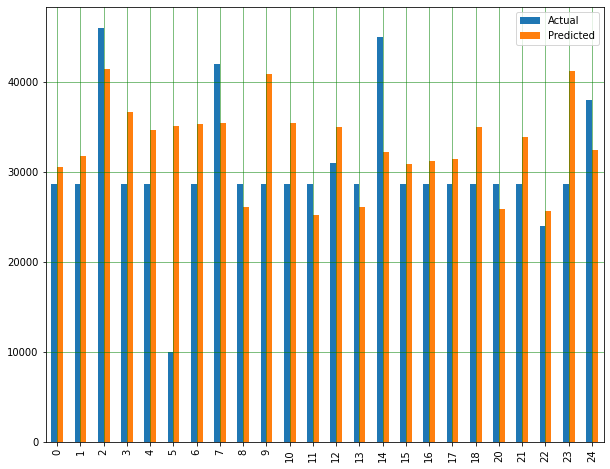

In [507]:
m.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [516]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(m['Actual'], m['Predicted'])
rmse = np.sqrt(mse)

In [517]:
rmse

7992.116680963919